# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100

#Set style for matplotlib
plt.style.use('seaborn-deep')

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [4]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Correlation Matrix

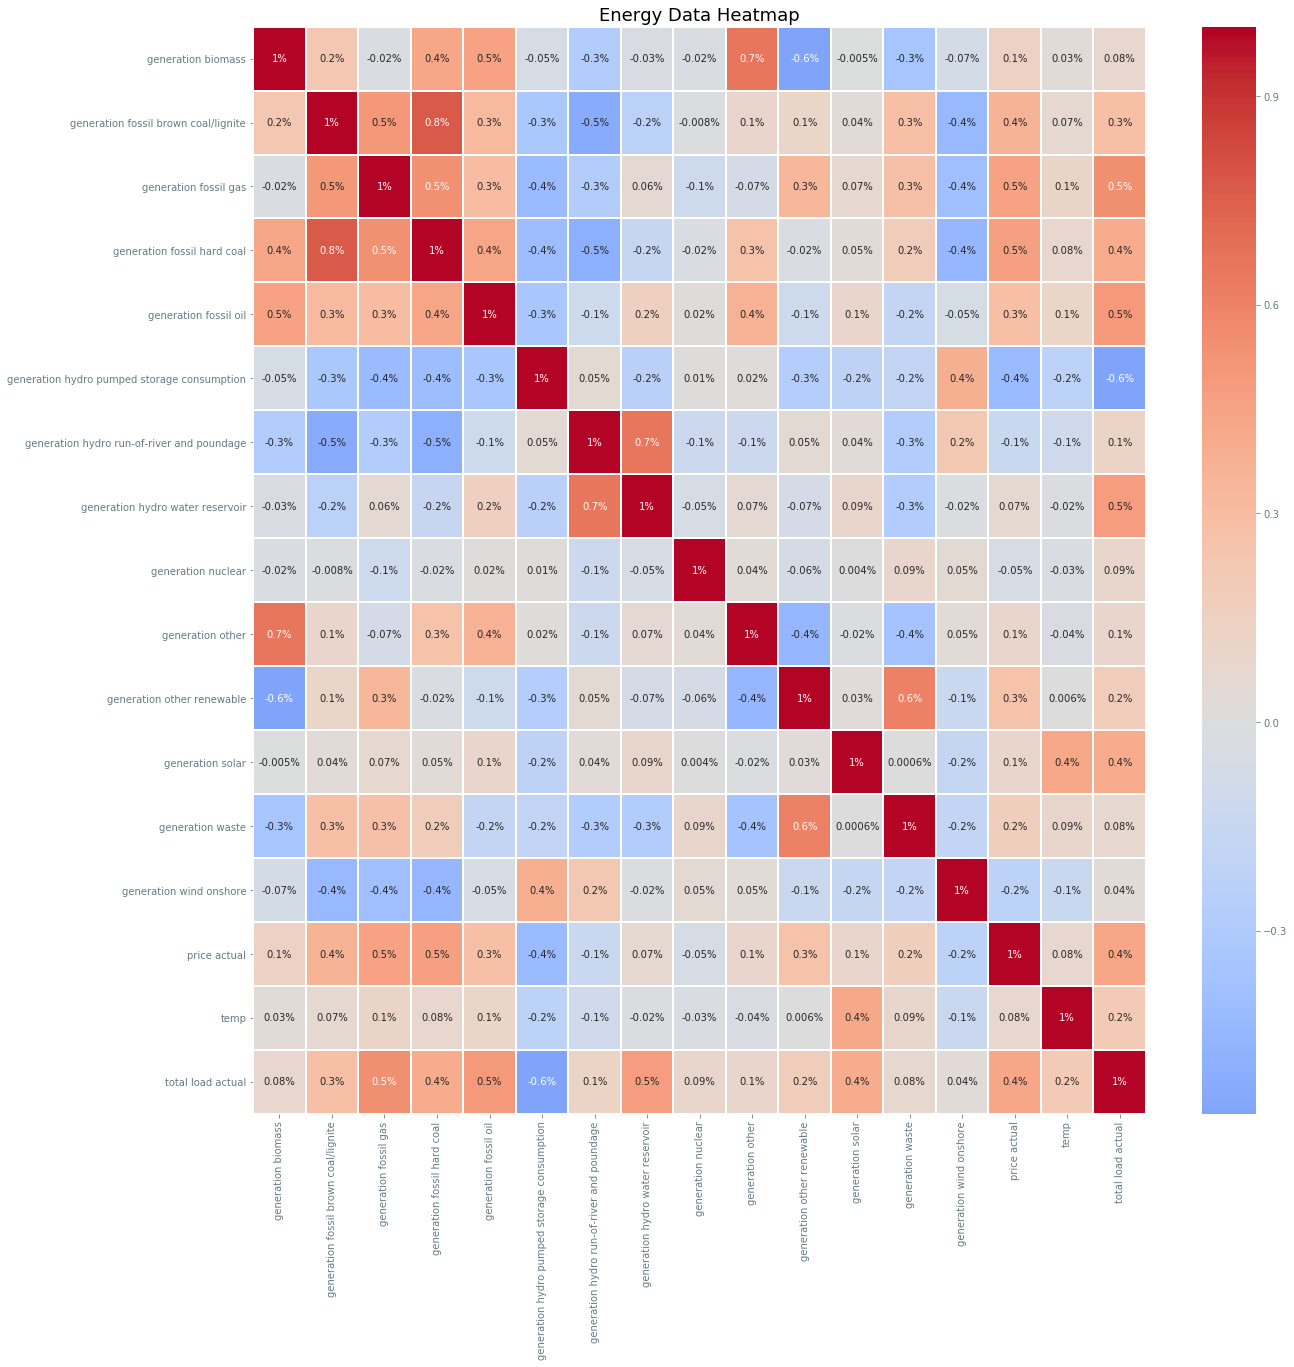

In [5]:
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300)

## Multivariate Model Testing

**Granger’s Causality Test**

In [6]:
# #Import Granger's Causality test
# from Time_Series_Tests import grangercausalitytests

# #Init grangers_causation_matrix
# grangers_causation_matrix(df, variables = df.columns)

**Cointegration Test**

In [7]:
#Import Granger's Causality test
from Time_Series_Tests import cointegration_test

#Implement cointegration_test
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
generation biomass ::  18663.33  > nan       =>   False
generation fossil brown coal/lignite ::  13109.93  > nan       =>   False
generation fossil gas ::  9682.19   > nan       =>   False
generation fossil hard coal ::  7726.02   > nan       =>   False
generation fossil oil ::  6426.79   > nan       =>   False
generation hydro pumped storage consumption ::  5180.42   > 311.1288  =>   True
generation hydro run-of-river and poundage ::  4249.76   > 263.2603  =>   True
generation hydro water reservoir ::  3413.07   > 219.4051  =>   True
generation nuclear ::  2667.06   > 179.5199  =>   True
generation other ::  2103.79   > 143.6691  =>   True
generation other renewable ::  1565.1    > 111.7797  =>   True
generation solar ::  1082.18   > 83.9383   =>   True
generation waste ::  659.01    > 60.0627   =>   True
generation wind onshore ::  381.45    > 40.1749   =>   True
price actual ::  187.07    > 24.2

## Make Features Stationary

**Split data into training and test sets**

In [8]:
#Assign train to X and labels to Y
y = df['price actual']
X= df.drop('price actual', axis =1)

#Split data 85% train and 15% test
cutoff = round(len(X) *.85)
X_train = X[:cutoff]
X_test = X[cutoff:]
y_train= y[:cutoff]
y_test= y[cutoff:]

#Check
print('Training data shape{} Label shape: {}'.format(X_train.shape,y_train.shape))
print('Test data shape{} Label shape: {}'.format(X_test.shape,y_test.shape))

Training data shape(29810, 16) Label shape: (29810,)
Test data shape(5260, 16) Label shape: (5260,)


**Check for Stationarity - ADF & KPSS Tests**

In [9]:
# #Import ADF_KPSS_test
# from Time_Series_Tests import ADF_KPSS_test

# for col in X_train.columns:
#     print('Results for {}'.format(str.title(col)))
#     ADF_KPSS_test(X_train[col],0)

## Check for Autocorrelation

In [10]:
# #Read in ACF and PACF PLots
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# #Create figure
# f, axes = plt.subplots(len(X_train.columns),1, figsize = (20,60))

# #PLot ACF
# for col, ax in zip(df.columns, axes.flat):
#     plot_acf(df[col], lags = 100, ax = ax, title = str.title(col) + ' Autocorrelation')
#     plt.tight_layout()
# # #Create figure
# # f, axes = plt.subplots(5,2, figsize = (40,20))

# # for col, ax in zip(df.columns, axes.flat):
# #     plot_pacf(df[col], lags = 200, ax = ax, title = str.title(col) + ' Partial Autocorrelation')

**Apply First Order Differencing to each column to reduce auto co**

In [11]:
# #Apply first order differencing
# transformed_df = df.diff(24).dropna()

# transformed_df = transformed_df.diff().dropna()

# #Create figure
# f, axes = plt.subplots(len(transformed_df.columns),1, figsize = (20,60))

# #PLot ACF
# for col, ax in zip(transformed_df.columns, axes.flat):
#     plot_acf(transformed_df[col], lags = 100, ax = ax, title = 'First Order Differenced '+ str.title(col) + ' Autocorrelation')
#     plt.tight_layout()

**Timeplots**

In [12]:
# first_order_df = df.filter(regex='First')

# f, axes = plt.subplots(5,1,figsize=(20,50))

# for col,ax in zip(first_order_df.columns, axes.flat):
#     first_order_df[col].plot(ax=ax, title = str.title(col), label = 'Differenced Data')
#     first_order_df[col].rolling(min_periods= 24*7, window = 24*14).mean().plot(ax=ax, color ='red')

In [13]:
# #Read in ACF and PACF PLots
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# #Create figure
# f, axes = plt.subplots(5,2, figsize = (40,20))

# for col, ax in zip(df.columns, axes.flat):
#     plot_acf(df[col], lags = 100, ax = ax, title = str.title(col) + ' Autocorrelation')

# #Create figure
# f, axes = plt.subplots(5,2, figsize = (40,20))

# for col, ax in zip(df.columns, axes.flat):
#     plot_pacf(df[col], lags = 200, ax = ax, title = str.title(col) + ' Partial Autocorrelation')

#### Tests for Stationarity

**ADF_KPSS_test**

In [14]:
# from StationarityTests import ADF_KPSS_test

# for col in df.columns:
#     print('Results for {}\n'.format(str.title(col)))
#     ADF_KPSS_test(df[col],0)

# Export Data

In [15]:
#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
X_train.to_csv(path + '/2020_0622_Training_Data.csv')
y_train.to_csv(path + '/2020_0622_Training_Labels.csv')
X_test.to_csv(path + '/2020_0622_Test_Data.csv')
y_test.to_csv(path + '/2020_0622_Test_Labels.csv')

NameError: name 'X_tr' is not defined